In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("train (1).csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test=pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
test.drop(columns=['Name', 'Ticket', 'Cabin','PassengerId','Parch'],inplace=True)

In [38]:
test['Age']=test['Age'].fillna(test.Age.median())
test['Age']=test['Age'].astype('int64')

In [39]:
test['Sex']=test['Sex'].map({'male':0, 'female':1})
test['Embarked']=test['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [40]:
test['Embarked']=test['Embarked'].fillna(0)
test['Fare']=test['Fare'].fillna(test.Fare.mean())

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# df['Age']=df['Age'].replace([np.inf, -np.inf],np.nan)
df['Age']=df.Age.fillna(df.Age.median())
df['Age']=df['Age'].astype('int64')
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [5]:
df.drop(columns='Cabin',inplace=True)

In [6]:
df['Embarked']=df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [7]:
df['Embarked']=df['Embarked'].fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [9]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})

In [10]:
df.drop(columns=['Name', 'Ticket','PassengerId','Parch'],inplace=True)

<AxesSubplot:>

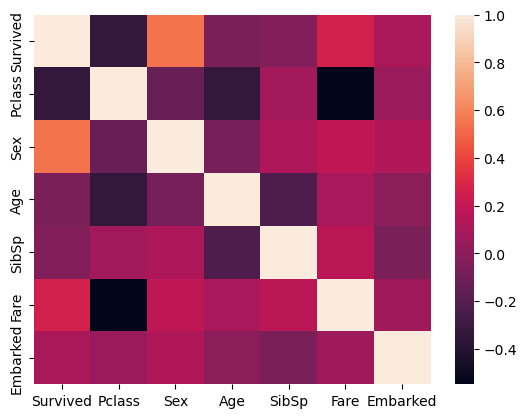

In [15]:
corr=df.corr()
sns.heatmap(corr)

In [16]:
target='Survived'
X=df.drop(columns='Survived')
y=df[target]

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
base_acc=df['Survived'].value_counts(normalize=True).max()
base_acc

0.6161616161616161

In [19]:
clf=make_pipeline(SimpleImputer(), RandomForestClassifier())

In [20]:
cv_acc = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
print(cv_acc)


[0.83216783 0.76223776 0.80985915 0.79577465 0.83802817]


In [21]:
params = {
    'simpleimputer__strategy':['mean', 'median'],
    'randomforestclassifier__n_estimators':range(25, 100, 25),
    'randomforestclassifier__max_depth':range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [22]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [24]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [27]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154122,0.007900,0.019789,0.005112,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.825175,0.818182,0.823944,0.823944,0.845070,0.827263,0.009230,2
1,0.147917,0.009896,0.015789,0.001602,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.846154,0.811189,0.838028,0.823944,0.823944,0.828652,0.012194,1
2,0.274843,0.009711,0.028983,0.003345,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.811189,0.825175,0.823944,0.823944,0.845070,0.825864,0.010882,5
3,0.278254,0.014076,0.029983,0.007506,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.825175,0.804196,0.823944,0.838028,0.838028,0.825874,0.012407,4


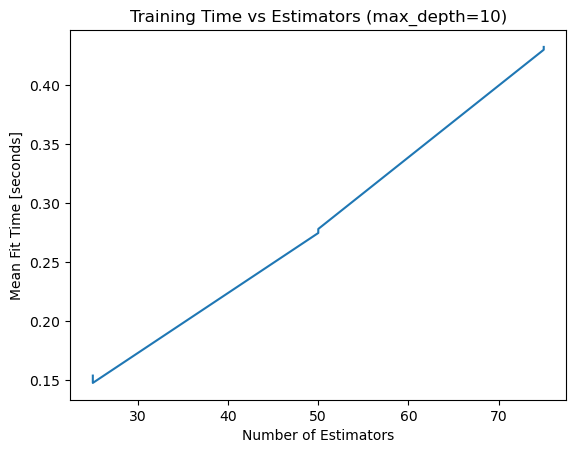

In [28]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(cv_results[mask]['param_randomforestclassifier__n_estimators'],
        cv_results[mask]['mean_fit_time'])
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

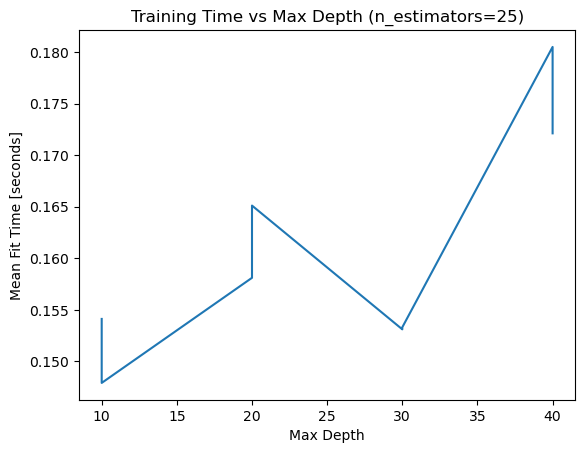

In [29]:
# Create mask
mask = cv_results['param_randomforestclassifier__n_estimators']==25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]['param_randomforestclassifier__max_depth'],
    cv_results[mask]['mean_fit_time']
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [30]:
# Extract best hyperparameters
model.best_score_

0.8286516300600807

In [31]:
model.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 25,
 'simpleimputer__strategy': 'median'}

In [32]:
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=25))])

In [33]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9424
Test Accuracy: 0.8212


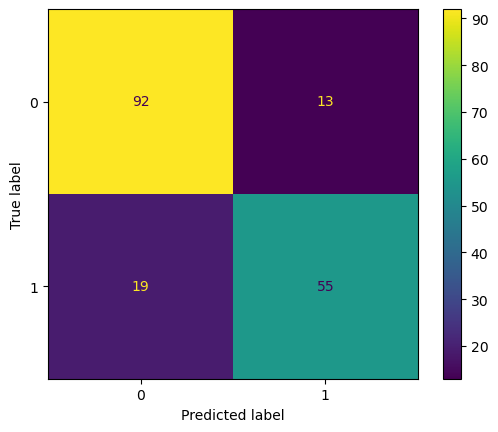

In [34]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

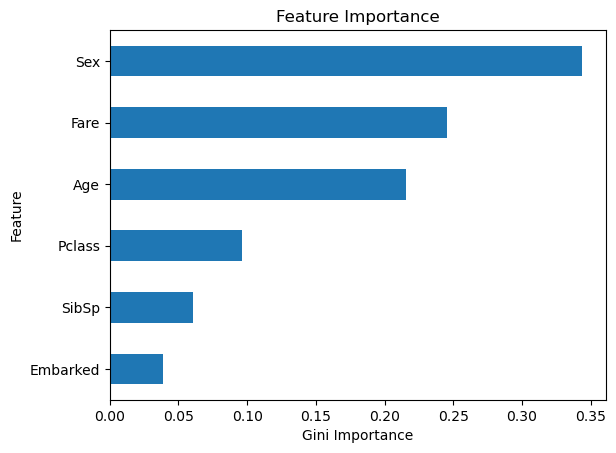

In [35]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [41]:
y_pred=model.predict(test)

In [43]:
t=pd.read_csv('test.csv')

In [44]:
results=pd.DataFrame({'PassengerId':t['PassengerId'], 'Survived':y_pred})
results.to_csv('Submissionz.csv', index=False)